In [17]:
import ase
import ase.io
import jax
import jax.numpy as jnp
import jraph
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
import tqdm

sys.path.append('..')
from analyses import analysis
from symphony import train, datatypes
from symphony.data import input_pipeline_tf

In [14]:
tf.config.experimental.set_visible_devices([], "GPU")

workdir = '/data/NFS/potato/songk/spherical-harmonic-net/workdirs/silica-nequip-heavy-first-jan4'
config, best_state_train, best_state_eval, metrics_for_best_state = analysis.load_from_workdir(workdir)
rng = jax.random.PRNGKey(config.rng_seed)
datasets = input_pipeline_tf.get_datasets(rng, config)

cutoff = 5.0
epsilon = 1e-4

[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 18348038937409288861
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 18348038937409288861
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing 

In [21]:
test_foci = []
for graphs in tqdm.tqdm(datasets["test"].as_numpy_iterator()):
    frags = jax.tree_map(jnp.asarray, graphs)
    frag_unpadded = jraph.unpad_with_graphs(frags)
    molecules = jraph.unbatch(frag_unpadded)
    for mol in molecules:
        if mol.globals.stop[0]:
            continue
        test_foci.append(mol.receivers[mol.senders == 0].shape[0])


88it [02:09,  1.47s/it]


KeyboardInterrupt: 

In [22]:
max(test_foci)

3

(array([138.,   0.,   0.,   0.,   0.,  83.,   0.,   0.,   0., 284.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

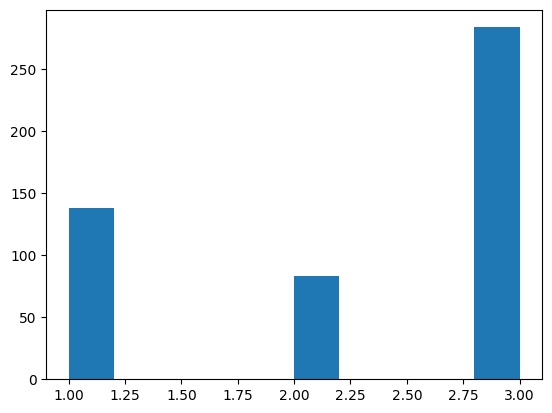

In [23]:
plt.hist(test_foci)